<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/LDABreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de Datos sobre Cáncer de Mama

## Descripción General
El conjunto de datos sobre cáncer de mama es un recurso ampliamente utilizado en la investigación de métodos de aprendizaje automático y análisis estadístico para clasificar tumores. Contiene información sobre características biométricas de tumores de mama y su clasificación como benignos o malignos.

## Origen del Conjunto de Datos
Este conjunto de datos fue introducido por el Wisconsin Breast Cancer Study y está disponible a través de la biblioteca `sklearn` en Python. Proporciona un marco para el desarrollo y la evaluación de algoritmos de clasificación.

## Estructura del Dataset
El conjunto de datos contiene 569 muestras, cada una con 30 características que describen distintos momentos y medidas del tumor. También incluye una etiqueta (target) que indica si el tumor es maligno o benigno.

### Características

Las 30 características originales son medidas computadas a partir de una imagen de un tumor obtenido con un escáner. Estas características incluyen:

1. **mean radius**: Promedio de la distancia desde el centro hasta los puntos frontera del tumor.
2. **mean texture**: Promedio de la variabilidad de la intensidad de los píxeles en la imagen.
3. **mean perimeter**: Promedio de la longitud de la frontera del tumor.
4. **mean area**: Promedio del área de los tumores.
5. **mean smoothness**: Promedio de la suavidad de la superficie del tumor.
6. **mean compactness**: Promedio de la relación entre el área del tumor y su perímetro.
7. **mean concavity**: Promedio de la gravedad de las concavidades de la forma del tumor.
8. **mean concave points**: Promedio de puntos de la forma del tumor que son cóncavos.
9. **mean symmetry**: Promedio de la simetría del tumor.
10. **mean fractal dimension**: Promedio de la complejidad de la forma del tumor.

Las otras 20 características corresponden a las desviaciones estándar (stdev) y los errores de estimación de las mismas métricas.

### Target
- **0**: Benigno
- **1**: Maligno

## Objetivo del Análisis
El principal objetivo al trabajar con este conjunto de datos es clasificar los tumores en benignos o malignos, utilizando técnicas de aprendizaje automático. Esta clasificación tiene aplicaciones clínicas importantes, ya que ayuda a determinar los enfoques de tratamiento adecuados para los pacientes.

## Aplicaciones
El conjunto de datos de cáncer de mama se utiliza en diversas aplicaciones, incluyendo:
- Desarrollo y evaluación de algoritmos de clasificación.
- Investigación sobre métodos de detección precoz de cáncer.
- Comparación entre métodos de aprendizaje automático y modelos estadísticos.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Cargar el conjunto de datos sobre cáncer de mama
data = load_breast_cancer()

# Crear un DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar las primeras filas del DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


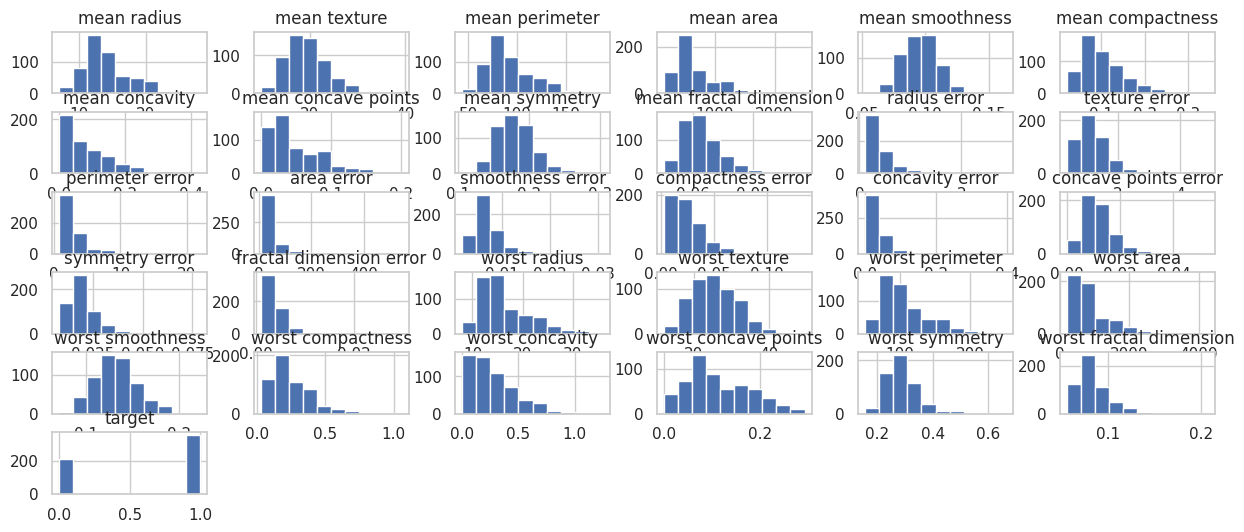

target
1    357
0    212
Name: count, dtype: int64


In [23]:
# Distribuciones de las variables
df.hist(figsize=(15, 6))
plt.show()

# Distribución de la variable target (0: benigno, 1: maligno)
print(df['target'].value_counts())

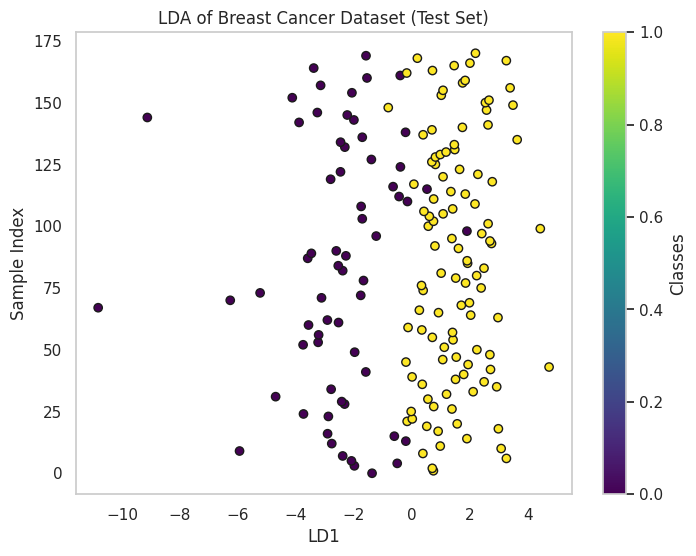

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.3, random_state=42, stratify=df['target'])

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo LDA
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train_scaled, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Transformar los datos de prueba para obtener las componentes LDA
X_lda = lda.transform(X_test_scaled)

# Visualizar los componentes LDA
plt.figure(figsize=(8, 6))
# X_lda only has one component, so we plot it against a range of values
plt.scatter(X_lda[:, 0], range(len(X_lda)), c=y_test, cmap='viridis', edgecolor='k')
plt.title('LDA of Breast Cancer Dataset (Test Set)')
plt.xlabel('LD1')
plt.ylabel('Sample Index') # Changed y-axis label to reflect the data being plotted
plt.colorbar(label='Classes')
plt.grid()
plt.show()

# Importancia de las Variables en Sklearn

## ¿Qué es `variables_importance`?

`variables_importance` es un término utilizado para describir el impacto de diferentes características (variables) en el rendimiento de un modelo de aprendizaje automático. En el contexto de modelos como el Análisis Discriminante Lineal (LDA) en `sklearn`, las importancias de las variables se pueden extraer a través de los coeficientes del modelo. Estos coeficientes indican cuán influyentes son las características en la clasificación final del modelo.

## Cómo se Calcula

Al ajustar un modelo LDA, se obtienen coeficientes para cada característica, que reflejan la relación entre cada variable y la variable objetivo (la clase a predecir). Un coeficiente más alto para una variable indica que tiene un mayor impacto en la discriminación entre las clases.

### Fórmula General de Coeficientes:

El coeficiente de cada variable se calcula durante el ajuste del modelo mediante algoritmos que intentan maximizar la separación entre las clases objetivo. En LDA, estos coeficientes son el resultado de resoluciones matemáticas relacionadas con las matrices de covarianza.

## Interpretación de los Coeficientes

- **Valores Positivos**: Indican que un aumento en la variable está asociado con la clase positiva (por ejemplo, un tumor maligno).
- **Valores Negativos**: Indican que un aumento en la variable está relacionado con la clase negativa (por ejemplo, un tumor benigno).
- **Cero o Cerca de Cero**: Implican que la variable tiene poca o ninguna influencia en la clasificación.

In [26]:
# Obtener los coeficientes del modelo
coefficients = lda.coef_[0]
variables_importance = pd.DataFrame(coefficients, index=data.feature_names, columns=['Coefficient'])
variables_importance = variables_importance.sort_values(by='Coefficient', ascending=False)

# Mostrar la tabla de coeficientes
print("Coeficientes del Modelo LDA:\n")
print(variables_importance)

Coeficientes del Modelo LDA:

                         Coefficient
mean radius                28.682209
worst area                 23.480775
mean compactness            6.768790
concavity error             2.731412
perimeter error             2.271480
worst perimeter             0.993191
radius error                0.890294
texture error               0.276065
compactness error           0.168650
worst smoothness            0.113854
worst symmetry             -0.075673
mean texture               -0.201719
fractal dimension error    -0.345510
mean concave points        -0.398993
worst fractal dimension    -0.455915
mean smoothness            -0.541493
symmetry error             -0.626553
mean symmetry              -0.719783
mean fractal dimension     -1.164749
concave points error       -1.215800
worst texture              -1.279439
smoothness error           -1.285799
worst compactness          -1.493812
worst concave points       -1.808968
mean concavity             -2.090707
worst co

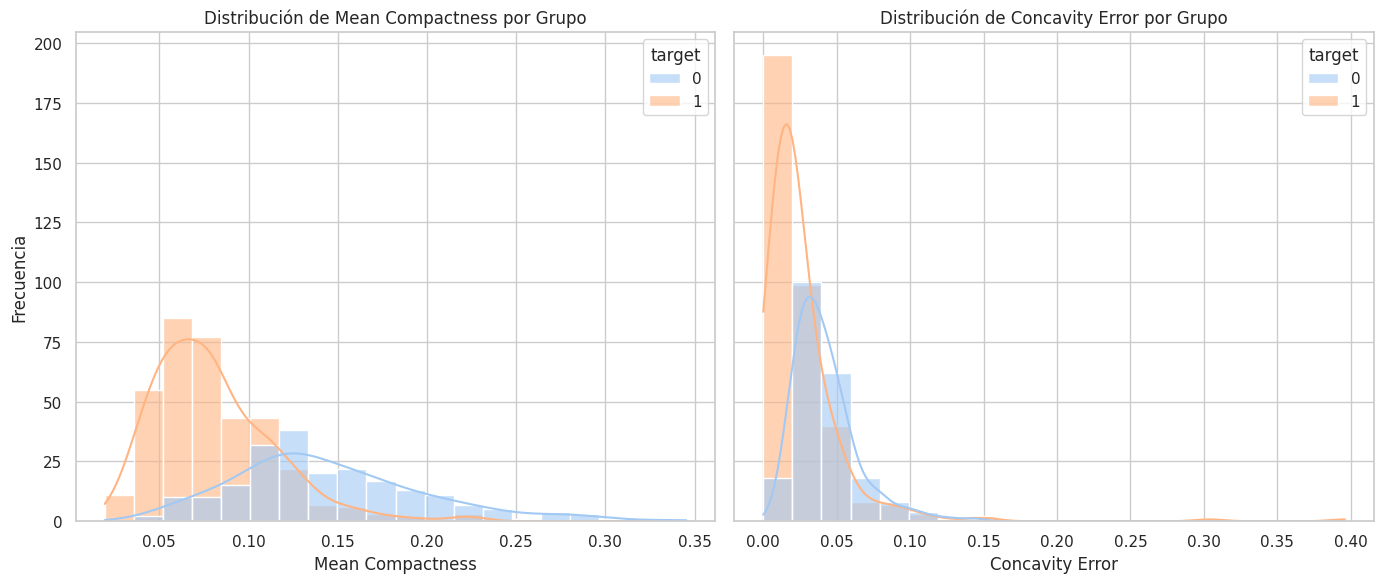

In [27]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para 'mean compactness'
sns.histplot(df, x='mean compactness', hue='target', kde=True,
             bins=20, alpha=0.6, palette='pastel', ax=axes[0])
axes[0].set_title('Distribución de Mean Compactness por Grupo')
axes[0].set_xlabel('Mean Compactness')
axes[0].set_ylabel('Frecuencia')

# Gráfico para 'concavity error'
sns.histplot(df, x='concavity error', hue='target', kde=True,
             bins=20, alpha=0.6, palette='pastel', ax=axes[1])
axes[1].set_title('Distribución de Concavity Error por Grupo')
axes[1].set_xlabel('Concavity Error')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Análisis Visual de los Boxplots en LDA

El análisis visual de los boxplots permite observar la distribución de las características seleccionadas en relación con la clasificación del conjunto de datos sobre cáncer de mama (benigno vs. maligno). A continuación se presenta un análisis de cada uno de los boxplots:

## 1. Boxplot de Mean Fractal Dimension

- **Descripción**: El boxplot muestra la distribución de `mean fractal dimension` para las dos clases:
  - La clase 0 (benigno) y la clase 1 (maligno).
- **Observaciones**:
  - La mediana para la clase 1 es significativamente más alta que para la clase 0, lo que sugiere que un mayor valor de `mean fractal dimension` podría estar asociado con tumores malignos.
  - Además, existen valores atípicos (outliers) en la clase 1, indicando que hay algunos casos de tumores malignos con un fractal dimension considerablemente más alto que el resto.

## 2. Boxplot de Concave Points Error

- **Descripción**: Este boxplot ilustra los valores de `concave points error` en función de la classificación.
- **Observaciones**:
  - Similar al primer boxplot, se observa que la mediana de `concave points error` es menor en la clase 1 (maligno) que en la clase 0 (benigno).
  - La separación entre las dos clases es clara y sugiere que un mayor error en los puntos cóncavos se asocia con tumores malignos.
  - Los intervalos intercuartílicos (IQR) no se superponen, lo que refuerza la idea de que esta variable es útil para la discriminación entre clases.

## 3. Boxplot de Smoothness Error

- **Descripción**: Este boxplot muestra cómo varía `smoothness error` entre clases.
- **Observaciones**:
  - La clase 1 presenta valores más altos de `smoothness error` en comparación con la clase 0, sugiriendo que tumores malignos tienden a ser más "irregulares" o "ásperos".
  - La mediana y los cuartiles de la clase 1 están elevados, lo que indica que el smoothness error es también una variable discriminativa efectiva en la clasificación.

## Conclusiones Generales

- **Relación con LDA**: Los boxplots ilustran cómo las características pueden ser efectivas en la separación de clases, algo crucial en el contexto del Análisis Discriminante Lineal (LDA). Las diferencias significativas en las distribuciones sugieren que estas variables pueden ser útiles para entrenar un modelo LDA y mejorar la clasificación de tumores como benignos o malignos.
- **Importancia de la Visualización**: Esta visualización no solo permite identificar cuáles variables son más influyentes, sino que también revela la naturaleza de las diferencias entre las clases, lo que puede guiar decisiones sobre el modelado y la selección de características.

El análisis visual mediante boxplots proporciona una comprensión clara de cómo cada variable contribuye a la clasificación y es una herramienta valiosa para la interpretación de modelos en el aprendizaje automático.


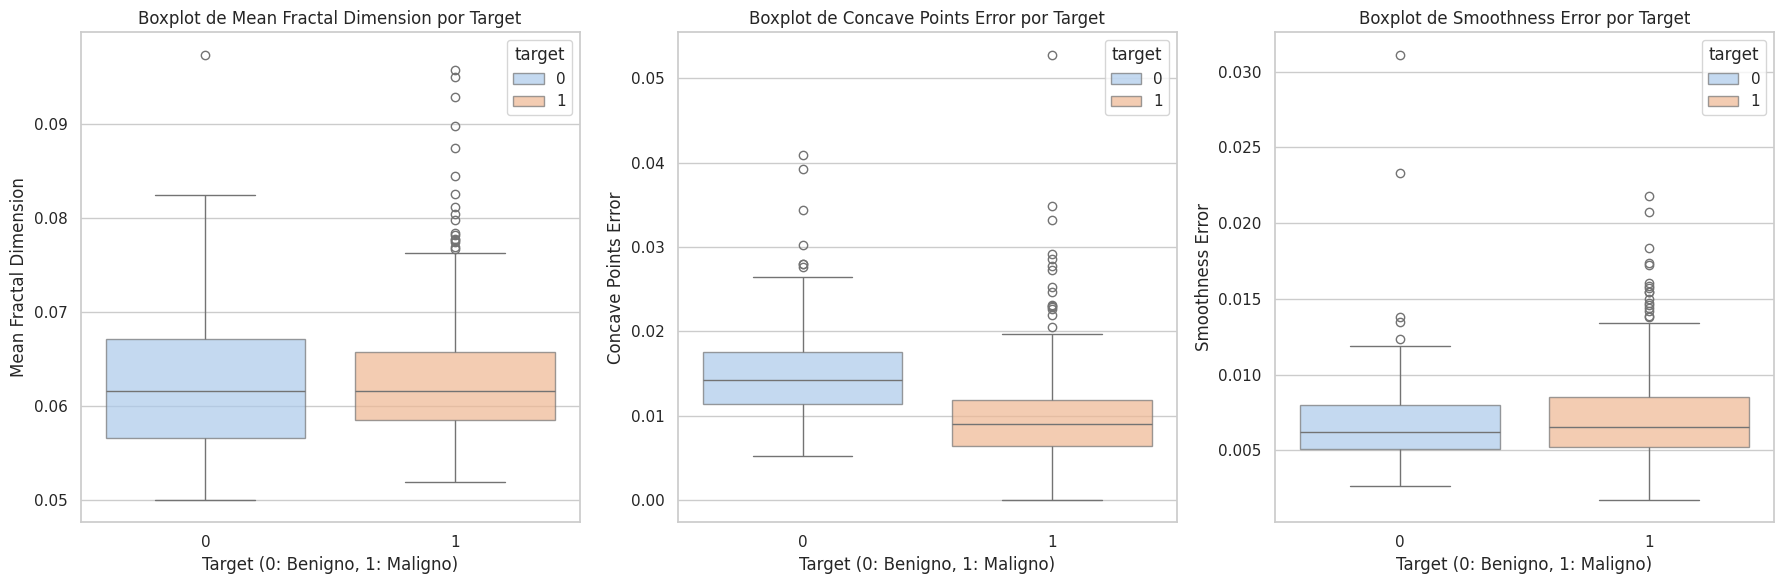

In [28]:
# Crear una figura con subgráficas para cada variable
plt.figure(figsize=(18, 6))

# Boxplot para 'mean fractal dimension'
plt.subplot(1, 3, 1)
sns.boxplot(hue='target', x='target', y='mean fractal dimension', data=df, palette='pastel', boxprops = dict(alpha=0.7))
plt.title('Boxplot de Mean Fractal Dimension por Target')
plt.xlabel('Target (0: Benigno, 1: Maligno)')
plt.ylabel('Mean Fractal Dimension')

# Boxplot para 'concave points error'
plt.subplot(1, 3, 2)
sns.boxplot(hue='target', x='target', y='concave points error', data=df, palette='pastel', boxprops = dict(alpha=0.7))
plt.title('Boxplot de Concave Points Error por Target')
plt.xlabel('Target (0: Benigno, 1: Maligno)')
plt.ylabel('Concave Points Error')

# Boxplot para 'smoothness error'
plt.subplot(1, 3, 3)
sns.boxplot(hue='target', x='target', y='smoothness error', data=df, palette='pastel', boxprops = dict(alpha=0.7))
plt.title('Boxplot de Smoothness Error por Target')
plt.xlabel('Target (0: Benigno, 1: Maligno)')
plt.ylabel('Smoothness Error')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.84      0.91        64
      benign       0.91      0.99      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



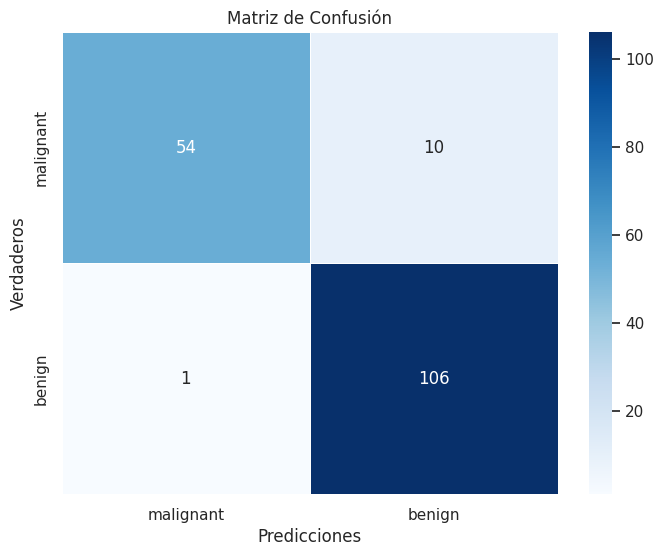

In [29]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Generar el classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Imprimir el classification report
print("Classification Report:\n")
print(report)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()